In [2]:
from scipy.stats import qmc
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import shutil
import os
from sklearn.metrics import mean_squared_error
from math import sqrt
import subprocess
import warnings
import scienceplots
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import ListedColormap
import contextily as ctx
import matplotlib.colors as mcolors
warnings.filterwarnings("ignore")

C:\Users\RIPHAWK\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\RIPHAWK\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


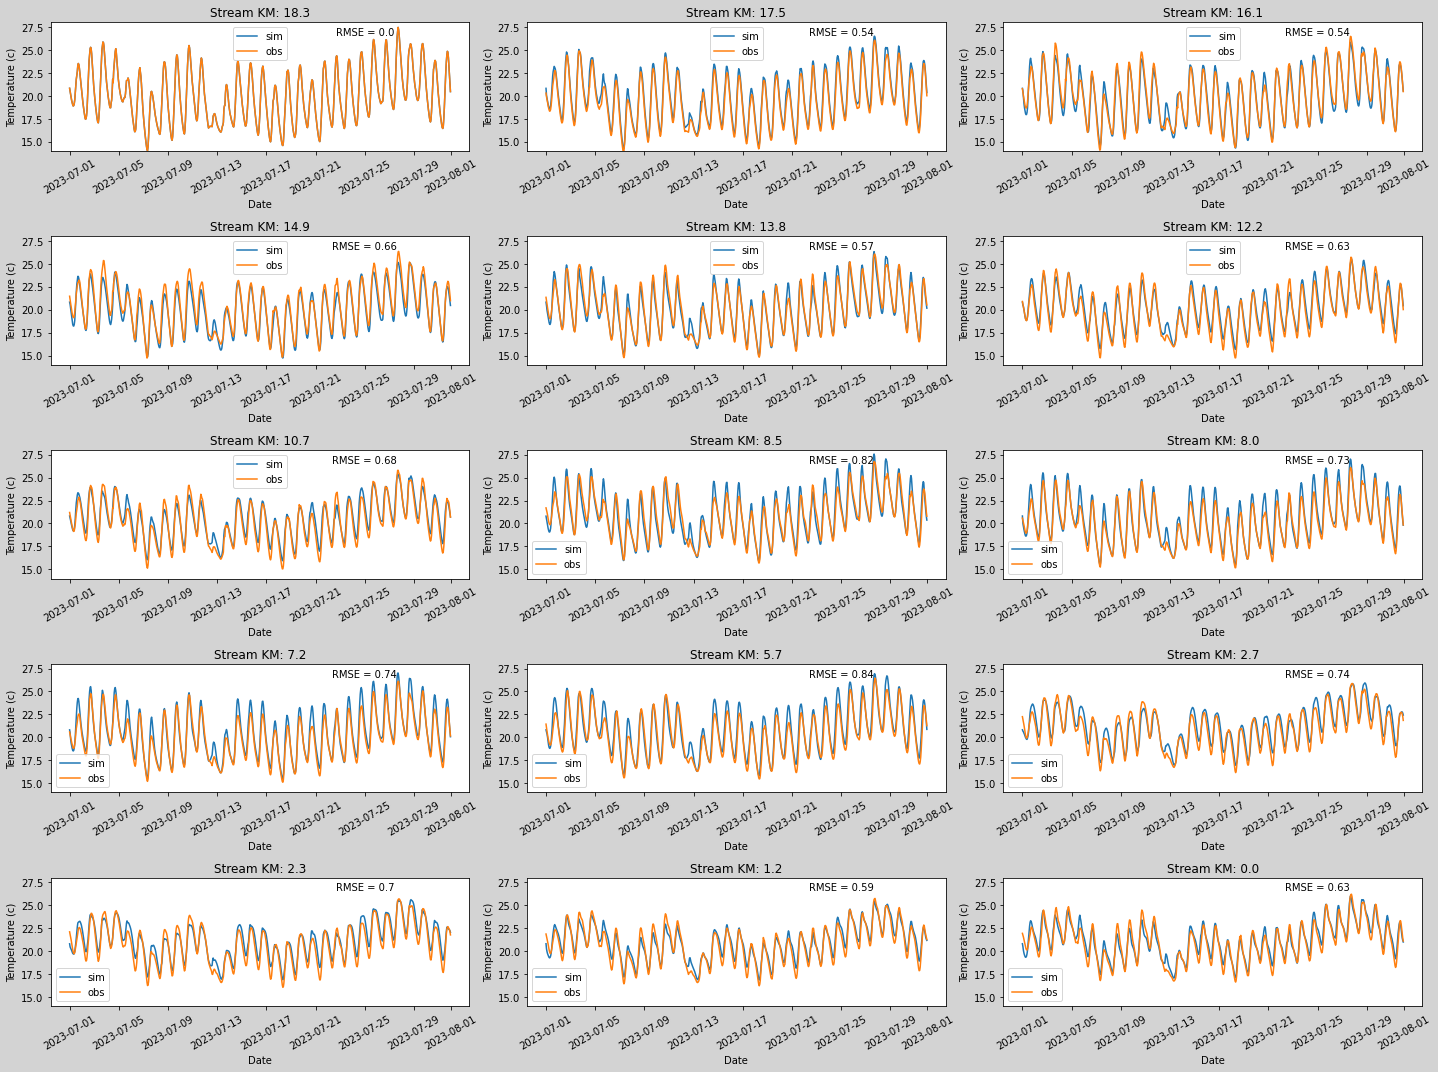

In [4]:
#all of july

#Run June
# hs_run =  rmse_sorted.iloc[0]
source_folder = r'D:/Ben_wd/THESIS/heatsource/WestFork/ModelRuns/Hayes/calibration/03152024_updatedinputs/July_monthly'
# obs_clip = obs[(obs["datetime"]>='07-01-2023') & (obs["datetime"]<'07-02-2023')]# + pd.DateOffset(1))]

#organize Obs data
obs = pd.read_csv(r"D:\Ben_wd\THESIS\streamtemperature\WFK23\Summer23\mainstemhourly_km.csv")
obs["datetime"] = pd.to_datetime(obs["datetime"])
# obs_clip = obs[(obs["datetime"]>=cc_start) & (obs["datetime"]<cc_end + pd.DateOffset(1))]
obs_clip = obs[(obs["datetime"]>='07-01-2023') & (obs["datetime"]<'08-01-2023')]
obs_clip = obs_clip.dropna(axis=1)
obs_clip = obs_clip.set_index('datetime')
#obs_clip.columns = [float(col) for col in obs_clip.columns[2:]]
obs_clip.columns = [float(col) for col in obs_clip.columns]
obs_clip.drop(19.2, axis=1, inplace=True)
obs_tw = obs_clip.to_numpy()
#Organize Sim data
sim_tw_df = pd.read_csv(os.path.join(source_folder, 'outputs', 'Temp_H2O.csv'), skiprows=6,
         usecols=range(1, 185))
sim_tw_df.columns = [float(col) for col in sim_tw_df.columns]
common_columns = set(sim_tw_df.columns) & set(obs_clip.columns)
sim_tw_df = sim_tw_df[obs_clip.columns]
sim_tw = sim_tw_df.to_numpy()
#print(starting_run_number)

#plotting
# Create a new figure with a 3x3 grid of subplots
fig, axes = plt.subplots(5, 3, figsize=(20, 15))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate through columns and plot each one in its own subplot
for i, col in enumerate(obs_clip.columns):
    rmse_values = np.sqrt(np.mean((sim_tw - obs_tw) ** 2, axis=0))
    title = str(col)
    axes[i].plot(obs_clip.index, sim_tw_df[col], label='sim')
    axes[i].plot(obs_clip.index, obs_clip[col], label='obs')

    # Add labels, title, and legend to each subplot
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Temperature (c)')
    axes[i].set_title(f'Stream KM: {title}')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].text(0.75, 0.9, f'RMSE = {round(rmse_values[i],2)}', horizontalalignment='center', transform=axes[i].transAxes)
    axes[i].set_ylim(14, 28)



   #Set background color of the figure
fig.patch.set_facecolor('lightgrey')

# Adjust layout
plt.tight_layout()

# Save the plot to a file
# plt.savefig('June_tempcomparison_plot.png', facecolor=fig.get_facecolor())



In [120]:
def mwmt(source_folder):
    model_tw_df = pd.read_csv(os.path.join(source_folder, 'outputs', 'Temp_H2O.csv'), skiprows=6,
         usecols=range(1, 185))
    control_file = pd.read_csv(os.path.join(source_folder, 'HeatSource_Control.csv'))
    #fill in dates/times for index of model output
    cc_start = control_file.loc[7]['VALUE']
    cc_start = pd.to_datetime(cc_start)
    cc_end = control_file.loc[8]['VALUE']
    cc_end = pd.to_datetime(cc_end)
    hourly_index = pd.date_range(start=cc_start, end=cc_end + pd.DateOffset(1), freq='D', inclusive='left')  # Closed left ensures end date is exclusive
    model_tw_df.columns = [float(col) for col in model_tw_df.columns]
    model_tw_df.index = hourly_index
    #mean & max july
    mean_daily_shade = allshade_tw_df.resample('D').mean()
    #adding MWMT
    mwmt = max_daily_shade.rolling(window=7).max()
    mwmt = shaded_mwmt.max()
    mwmt = pd.DataFrame(shaded_mwmt)
    return mwmt


In [121]:
base_mwmt = mwmt(r'D:/Ben_wd/THESIS/heatsource/WestFork/ModelRuns/Hayes/calibration/03152024_updatedinputs/July_monthly')

ValueError: Length mismatch: Expected axis has 744 elements, new values have 31 elements

In [5]:
#summaries for base data
allshade_tw_df = pd.read_csv(os.path.join(source_folder, 'outputs', 'Temp_H2O.csv'), skiprows=6,
         usecols=range(1, 185))
allshade_tw_df.columns = [float(col) for col in allshade_tw_df.columns]
allshade_tw_df.index = obs_clip.index
#mean & max july
mean_daily_shade = allshade_tw_df.resample('D').mean()
max_daily_shade = allshade_tw_df.resample('D').max()

#adding MWAT
shaded_mwat = mean_daily_shade.rolling(window=7).mean()
shaded_mwat = shaded_mwat.max()
shaded_mwat = pd.DataFrame(shaded_mwat)

#adding MWMT
shaded_mwmt = max_daily_shade.rolling(window=7).mean()
shaded_mwmt = shaded_mwmt.max()
shaded_mwmt = pd.DataFrame(shaded_mwmt)
shaded_mwat

,0
18.3,21.662161
18.2,21.701530
18.1,21.755016
18.0,21.862088
17.9,21.947868
...,...
0.4,22.877087
0.3,22.897788
0.2,22.908505
0.1,22.932885


In [6]:
max_daily_shade

,18.3,18.2,18.1,18.0,17.9,17.8,17.7,17.6,17.5,17.4,...,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0
datetime,,,,,,,,,,,,,,,,,,,,,
2023-07-01,23.521,23.5507,23.5122,23.6009,23.6772,23.7670,23.0059,23.0984,23.2050,23.3163,...,22.9853,23.0180,23.0487,23.0868,23.1259,23.1508,23.1855,23.2204,23.2715,23.3173
2023-07-02,25.283,25.3134,25.1806,25.2719,25.4256,25.5292,24.6688,24.7085,24.7759,24.8415,...,24.0686,24.1099,24.1485,24.1950,24.2418,24.2727,24.3047,24.3285,24.3677,24.4025
2023-07-03,25.866,25.7494,25.6768,25.6964,25.7010,25.7155,24.9626,25.0114,25.0532,25.0904,...,23.6030,23.6372,23.6724,23.7176,23.7658,23.7990,23.8330,23.8594,23.9027,23.9451
2023-07-04,25.137,25.0728,24.9962,25.0142,25.0234,25.0008,24.1566,24.1261,24.1406,24.2095,...,24.0590,24.1090,24.1601,24.2285,24.2942,24.3370,24.3764,24.4126,24.4662,24.5100
2023-07-05,21.939,21.9235,22.0748,22.3654,22.5856,22.7128,22.0955,22.2530,22.3880,22.5178,...,23.4968,23.5459,23.5953,23.6532,23.7120,23.7528,23.7924,23.8254,23.8747,23.9200
2023-07-06,23.064,23.0356,22.8467,22.8808,22.9699,23.0515,22.2956,22.3009,22.3410,22.3809,...,22.1137,22.1541,22.1952,22.2485,22.3012,22.3368,22.3710,22.4007,22.4443,22.4814
2023-07-07,20.484,20.5793,20.7362,20.9758,21.1627,21.2773,20.7128,20.6756,20.7744,20.8932,...,20.6810,20.7181,20.7553,20.7962,20.8688,20.9210,20.9677,21.0151,21.0774,21.1301
2023-07-08,23.713,23.6964,23.5733,23.7127,23.8479,23.9109,23.1341,23.1029,23.1258,23.1515,...,21.5888,21.6245,21.6578,21.6942,21.7324,21.7587,21.7863,21.8057,21.8462,21.8856
2023-07-09,24.460,24.4374,24.2694,24.3181,24.3577,24.3661,23.5511,23.4735,23.5191,23.5825,...,22.1319,22.1708,22.2085,22.2561,22.3033,22.3348,22.3659,22.3917,22.4313,22.4657


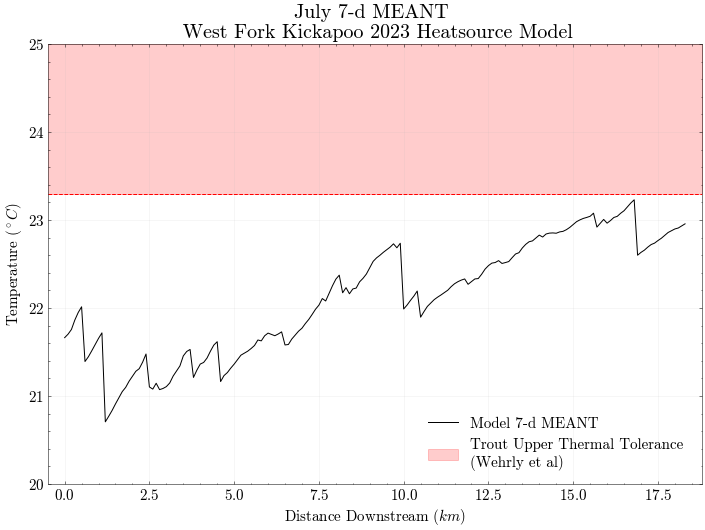

In [18]:
with plt.style.context(['science', 'no-latex']):
    plt.figure(figsize=(10, 7))
    plt.plot(18.3 - shaded_mwat.index, shaded_mwat[0], label='Model 7-d MEANT', color = 'black')
    #plt.plot(upstreamconstant_modeled.index/10, upstreamconstant_modeled['Mean MWAT'], label='July Max MWAT', color = 'black')

    #plt.plot(max_dailymean_scenario.index/10,max_dailymean_scenario['Max Daily Mean July Temp'],  label = 'Shade Scenario Model')
    # plt.scatter(18.3-mean_july_obs['NODE_ID'], mean_july_obs['Max MWAT'], label = 'Temp sensor', color = 'red', alpha = .7)
    #this line is just for legend item
    #p#lt.scatter(base_shade_df_mean.index/10, base_shade_df_mean['yvalue'], c='orange', s = 15, label = 'Not Shaded', marker = 's')

    #plt.scatter(base_shade_df_mean.index/10, base_shade_df_mean['yvalue'], c=base_shade_df_mean['color'], s = 15, label = 'Shaded', marker = 's')
    # plt.vlines(trib_dict_downstream,ymin = 21.5, ymax = 24.5,  label = 'Tributary', linestyles = 'dashed', alpha = .4)
    plt.axhline(y=23.3, linestyle='--', color='red')
    # plt.fill_between(upstreamconstant_modeled.index/10, upstreamconstant_modeled['Max MWAT'], y2=23.3, where=(upstreamconstant_modeled['Max MWAT'] > 23.3), color='red', alpha=0.3, label = 'Exceeding Trout Thermal Tolerance')

    # plt.fill_between((18.3 - shaded_max_mwat.index).min(), (18.3 - shaded_max_mwat.index).max(), y2=23.3, where=(shaded_max_mwat[0] > 23.3), interpolate=True, color='blue')

    # plt.fill_between(shaded_max_mwat.index, shaded_max_mwat[0], y2=23.3, where=(shaded_max_mwat > 23.3), interpolate=True, color='blue')
    x = np.linspace(-1,18.8,10)


    plt.fill_between(x,25, 23.3, color = 'red', alpha = .2, label='Trout Upper Thermal Tolerance \n(Wehrly et al)')

    plt.ylabel('Temperature (${^\circ}C$)', size = 15)
    plt.yticks(size= 15)
    plt.xticks(size= 15)

    plt.xlabel('Distance Downstream ($km$)', size = 15)
    #plt.figure(facecolor='black')

        # Adjust layout
    plt.tight_layout()
    plt.grid(alpha = .2)
    plt.ylim(20, 25)
    plt.xlim(-.5, 18.8)

    #plt.vlines(trib_dict_downstream, ymin = 20, ymax = 25, label = 'Tribs',color = 'Orange', linestyles = 'dashed')
    plt.legend(loc = 'lower right', fontsize = 15)
    plt.title('July 7-d MEANT \n West Fork Kickapoo 2023 Heatsource Model', size =20)
    plt.savefig(r'D:\Ben_wd\THESIS\figs\Thesis\JulyMaxMWAT.png',bbox_inches='tight', dpi=300)
    plt.show()

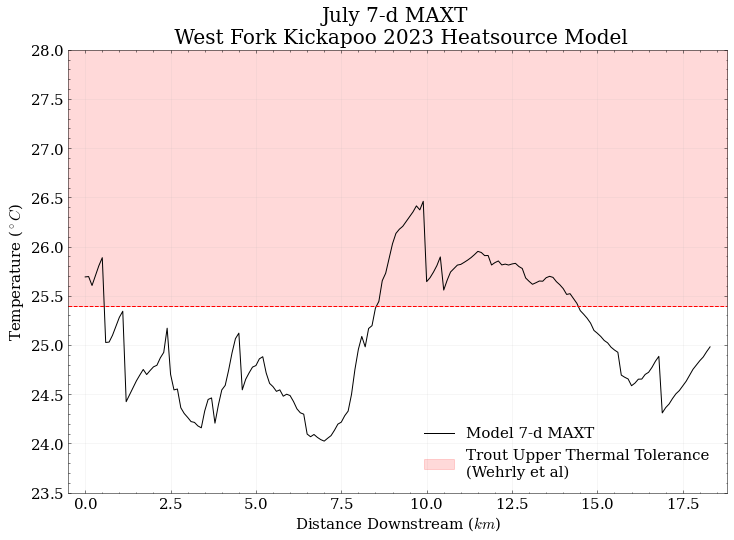

In [19]:
with plt.style.context(['science', 'no-latex']):

    plt.figure(figsize=(10, 7))
    plt.plot(18.3 - shaded_mwmt.index, shaded_mwmt[0], label='Model 7-d MAXT', color = 'black')
    #plt.plot(upstreamconstant_modeled.index/10, upstreamconstant_modeled['Mean MWAT'], label='July Max MWAT', color = 'black')

    #plt.plot(max_dailymean_scenario.index/10,max_dailymean_scenario['Max Daily Mean July Temp'],  label = 'Shade Scenario Model')
    # plt.scatter(18.3-mean_july_obs['NODE_ID'], mean_july_obs['Max MWAT'], label = 'Temp sensor', color = 'red', alpha = .7)
    #this line is just for legend item
    #p#lt.scatter(base_shade_df_mean.index/10, base_shade_df_mean['yvalue'], c='orange', s = 15, label = 'Not Shaded', marker = 's')

    #plt.scatter(base_shade_df_mean.index/10, base_shade_df_mean['yvalue'], c=base_shade_df_mean['color'], s = 15, label = 'Shaded', marker = 's')
    # plt.vlines(trib_dict_downstream,ymin = 21.5, ymax = 24.5,  label = 'Tributary', linestyles = 'dashed', alpha = .4)
    plt.axhline(y=25.4, linestyle='--', color='red')
    # plt.fill_between(upstreamconstant_modeled.index/10, upstreamconstant_modeled['Max MWAT'], y2=23.3, where=(upstreamconstant_modeled['Max MWAT'] > 23.3), color='red', alpha=0.3, label = 'Exceeding Trout Thermal Tolerance')

    # plt.fill_between((18.3 - shaded_max_mwat.index).min(), (18.3 - shaded_max_mwat.index).max(), y2=23.3, where=(shaded_max_mwat[0] > 23.3), interpolate=True, color='blue')

    # plt.fill_between(shaded_max_mwat.index, shaded_max_mwat[0], y2=23.3, where=(shaded_max_mwat > 23.3), interpolate=True, color='blue')
    x = np.linspace(-1,18.8,10)

    plt.fill_between(x,29, 25.4, color = 'red', alpha = .15, label='Trout Upper Thermal Tolerance \n(Wehrly et al)')

    plt.ylabel('Temperature (${^\circ}C$)', size = 15)
    plt.xlabel('Distance Downstream ($km$)', size = 15)
    #plt.figure(facecolor='black')

        # Adjust layout
    plt.tight_layout()
    plt.grid(alpha = .2)
    plt.ylim(23.5, 28)
    plt.yticks(size= 15)
    plt.xticks(size= 15)
    plt.xlim(-.5, 18.8)

    #plt.vlines(trib_dict_downstream, ymin = 20, ymax = 25, label = 'Tribs',color = 'Orange', linestyles = 'dashed')
    plt.legend(loc = 'lower right', fontsize = 15)
    plt.title('July 7-d MAXT \n West Fork Kickapoo 2023 Heatsource Model', size = 20)
    
plt.savefig(r'D:\Ben_wd\THESIS\figs\Thesis\JulyMaxMWMT.png',bbox_inches='tight', dpi=300)
plt.show()


In [155]:
from IPython.display import display, HTML

reaches_exceeding_max_mwmt = shaded_mwmt[shaded_mwmt[0]>25.4]
reaches_exceeding_max_mwmt.index = 18.3 - reaches_exceeding_max_mwmt.index
display(HTML(reaches_exceeding_max_mwmt.to_html()))
reaches_exceeding_max_mwmt

,0
0.0,25.691571
0.1,25.695100
0.2,25.604571
0.3,25.704586
0.4,25.805471
0.5,25.886943
8.6,25.442571
8.7,25.653443
8.8,25.729300
8.9,25.879557


,0
0.0,25.691571
0.1,25.695100
0.2,25.604571
0.3,25.704586
0.4,25.805471
...,...
14.0,25.572600
14.1,25.513543
14.2,25.521157
14.3,25.471357


In [154]:
from IPython.display import display, HTML

reaches_exceeding_mwat = shaded_mwmt[shaded_mwat[0]>23.3]
reaches_exceeding_mwat.index = 18.3 - reaches_exceeding_mwat.index
#display(HTML(reaches_exceeding_mwat.to_html()))
reaches_exceeding_mwat

,0
